In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [2]:
df = pd.read_csv('Task 3 and 4_Loan_Data.csv')
df.head(5)

customer_id  credit_lines_outstanding  loan_amt_outstanding  \
0      8153374                         0           5221.545193   
1      7442532                         5           1958.928726   
2      2256073                         0           3363.009259   
3      4885975                         0           4766.648001   
4      4700614                         1           1345.827718   

   total_debt_outstanding       income  years_employed  fico_score  default  
0             3915.471226  78039.38546               5         605        0  
1             8228.752520  26648.43525               2         572        1  
2             2027.830850  65866.71246               4         602        0  
3             2501.730397  74356.88347               5         612        0  
4             1768.826187  23448.32631               6         631        0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [4]:
# Check for missing values
print(df.isnull().sum())

customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64


# Exploratory Data Analysis

Let's check if the FICO score accurately predicts default in your dataset using statistical methods in Python.

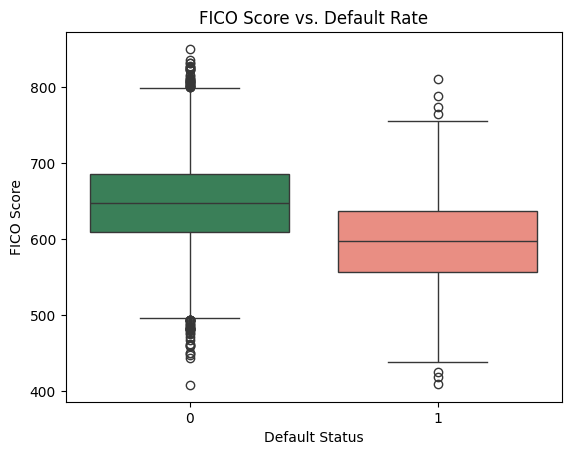

In [5]:
# FICO Score vs. Default Rate

sns.boxplot(x='default',
            y='fico_score',
            data=df,
            hue='default',
            palette=['seagreen', 'salmon'],
            legend=False)
plt.xlabel('Default Status')
plt.ylabel('FICO Score')
_ = plt.title('FICO Score vs. Default Rate')

Here, we'll perform hypothesis testing by using logistic regression to model the relationship between FICO score and default. The p-value associated with the 'fico_score' coefficient in the summary output will indicate if the relationship is statistically significant. A low p-value (typically below 0.05) suggests that the FICO score is a significant predictor of default.

In [6]:
import statsmodels.formula.api as sm

# Define the logistic regression model
model = sm.logit("default ~ fico_score", data=df)

# Fit the model
results = model.fit()

# Print the results
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.423915
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                  0.1151
Time:                        23:57:02   Log-Likelihood:                -4239.2
converged:                       True   LL-Null:                       -4790.4
Covariance Type:            nonrobust   LLR p-value:                9.519e-242
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0237      0.308     26.040      0.000       7.420       8.628
fico_score    -0.0153      0.

Let's break down the output of the logistic regression model:

1.   **FICO Score is a Significant Predictor:** The very low p-value (close to 0) for the 'fico_score' coefficient indicates that it's a statistically significant predictor of default.

2.  **Negative Relationship:** The negative coefficient (-0.0153) suggests that as the FICO score increases, the probability of default decreases. This aligns with the general understanding of FICO scores.

3.   **Model Fit:** The Pseudo R-squared value of 0.1151 suggests that the model explains about 11.51% of the variance in the default variable. This is a moderate fit, indicating that while FICO score is a significant predictor, other factors also contribute to default risk.

In summary, the logistic regression results support the idea that FICO score is a statistically significant predictor of loan default, and higher FICO scores are associated with lower default probabilities.

# Distribution of Outstanding Loan Amounts

Let's look at the concentration of loans at different outstanding amounts. This is crucial for risk management and business decisions.

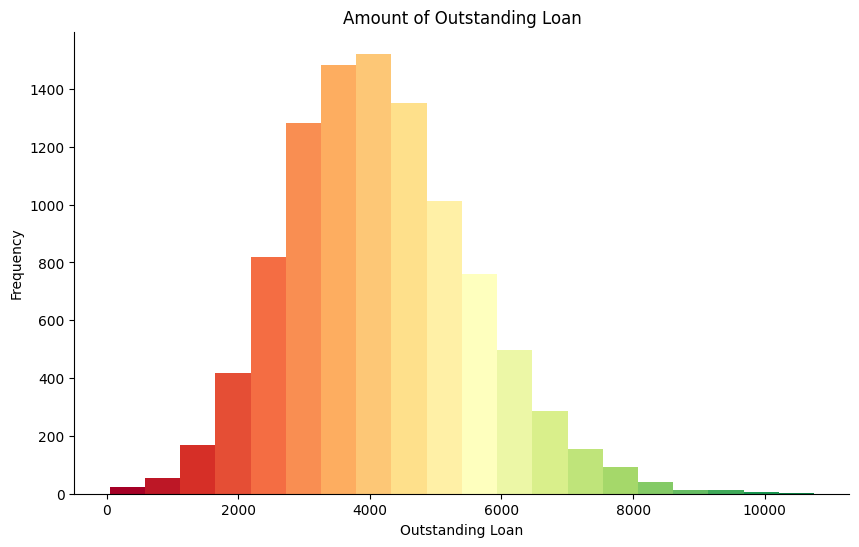

In [7]:
# amount of outstanding loan

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['loan_amt_outstanding'], bins=20)
norm = plt.Normalize(bins.min(), bins.max())
for i, patch in enumerate(patches):
    color = cm.RdYlGn(norm(bins[i]))
    patch.set_facecolor(color)

plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Outstanding Loan')
plt.ylabel('Frequency')
plt.title('Amount of Outstanding Loan')
plt.show()

In [8]:
# Calculate Descriptive Statistics

loan_amount_stats = df['loan_amt_outstanding'].describe()
print(loan_amount_stats)

count    10000.000000
mean      4159.677034
std       1421.399078
min         46.783973
25%       3154.235371
50%       4052.377228
75%       5052.898103
max      10750.677810
Name: loan_amt_outstanding, dtype: float64


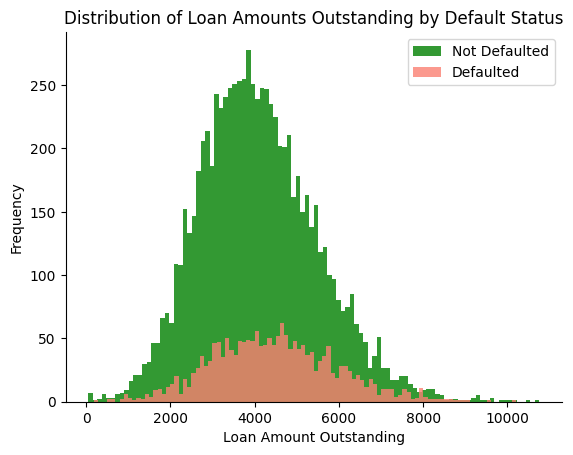

In [9]:
# Distribution of Loan Amounts Outstanding by Default Status

plt.hist(df[df['default'] == 0]['loan_amt_outstanding'], bins=100, alpha=0.8, label='Not Defaulted', color='green')
plt.hist(df[df['default'] == 1]['loan_amt_outstanding'], bins=100, alpha=0.8, label='Defaulted', color='salmon')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Loan Amount Outstanding')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts Outstanding by Default Status')
_ = plt.legend()

<Figure size 1400x800 with 0 Axes>

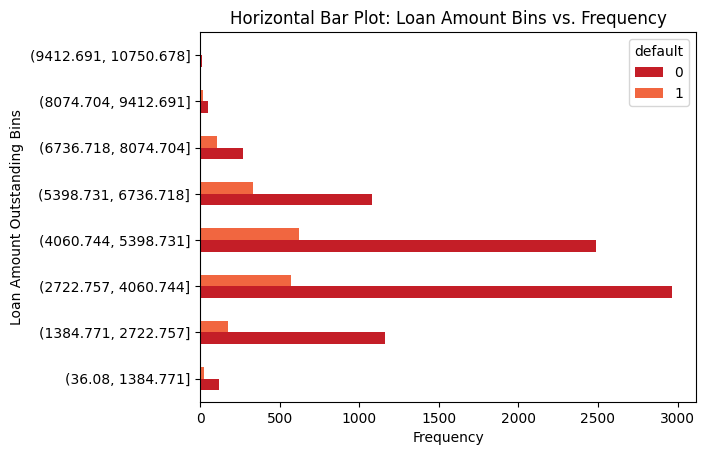

In [10]:
plt.figure(figsize=(14, 8))
bins = pd.cut(df['loan_amt_outstanding'], bins=8)

grouped = df.groupby(['default', bins], observed=True)['loan_amt_outstanding'].count().unstack(level=0)

cmap = plt.colormaps['RdYlGn']
norm = plt.Normalize(bins.min().left, bins.max().right)

colors = []
for val in grouped.index.categories.mid:
  colors.append(cmap(norm(val)))

grouped.plot(kind='barh', color=colors)

plt.gca().spines[['top', 'right']].set_visible(True)
plt.ylabel('Loan Amount Outstanding Bins')
plt.xlabel('Frequency')
plt.title('Horizontal Bar Plot: Loan Amount Bins vs. Frequency')
plt.show()

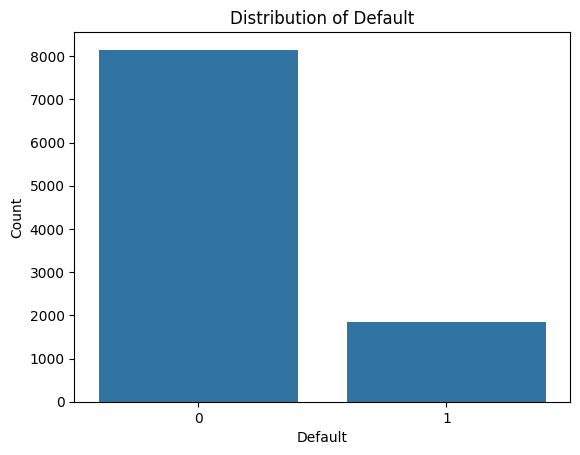

In [11]:
# Distribution of the target variable
sns.countplot(x='default', data=df)
plt.title('Distribution of Default')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

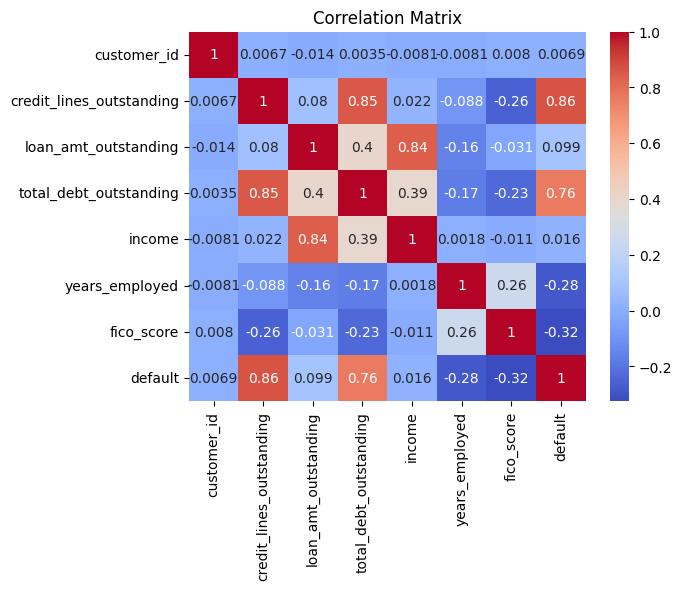

In [12]:
# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering

In [13]:
df['debt_to_income_ratio'] = df['total_debt_outstanding'] / df['income']

# Drop the 'customer_id' column since it's not useful
df = df.drop(columns=['customer_id'])

# Handling Class Imbalance

In [14]:
try:
    from imblearn.over_sampling import SMOTE
except ModuleNotFoundError:
    !pip install imblearn
    from imblearn.over_sampling import SMOTE

In [17]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [18]:
# Separate features and target
X = df.drop(columns=['default'])
y = df['default']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Check the new class distribution
print(y_res.value_counts())

default
0    8149
1    8149
Name: count, dtype: int64


# Probability of Default Calculation

[LightGBM] [Info] Number of positive: 6535, number of negative: 6503
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 13038, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501227 -> initscore=0.004909
[LightGBM] [Info] Start training from score 0.004909

Credit Risk Assessment System

=== Credit Risk Assessment Form ===
Enter annual income ($): 30000
Enter total debt outstanding ($): 13500
Enter age: 33
Enter FICO score (300-850): 210
Enter number of credit lines outstanding: 6
Enter loan amount outstanding ($): 13500
Enter years employed: 9

=== Risk Assessment Results ===
Probability of Default: 7.78%
Risk Classification: Low Risk
Expected Loss: $945.56

=== Model Calibration Curve ===
Visu

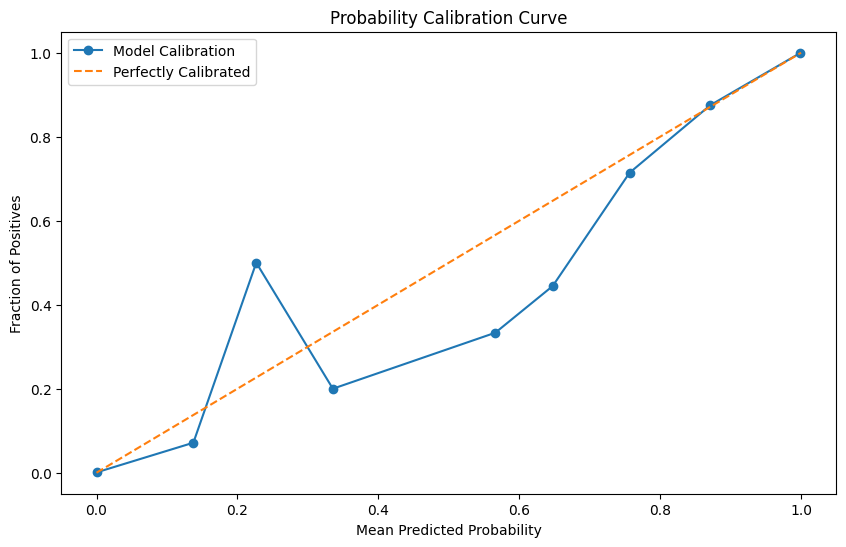

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.calibration import calibration_curve
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

class DefaultProbabilityCalculator:
    def __init__(self, model, X_train, X_test, y_train, y_test, feature_names):
        self.model = model
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.feature_names = feature_names
        self.scaler = StandardScaler()
        self.scaler.fit(X_train)

    def train_model(self):
        self.model.fit(self.X_train, self.y_train)

    def predict_probabilities(self):
        return self.model.predict_proba(self.X_test)[:, 1]

    def calculate_default_probability(self, features):
        # Convert input to DataFrame with correct feature names
        features_df = pd.DataFrame([features], columns=self.feature_names)

        # Scale the input features using the fitted scaler
        scaled_features = self.scaler.transform(features_df)

        # Predict probability of default
        default_prob = self.model.predict_proba(scaled_features)[:, 1]

        return default_prob[0]

    def calibrate_probabilities(self):
        # Predict probabilities for test set
        y_pred_proba = self.model.predict_proba(self.X_test)[:, 1]

        # Calculate calibration curve
        prob_true, prob_pred = calibration_curve(self.y_test, y_pred_proba, n_bins=10)

        return prob_true, prob_pred

    def visualize_calibration(self):
        prob_true, prob_pred = self.calibrate_probabilities()

        plt.figure(figsize=(10, 6))
        plt.plot(prob_pred, prob_true, marker='o', label='Model Calibration')
        plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
        plt.xlabel('Mean Predicted Probability')
        plt.ylabel('Fraction of Positives')
        plt.title('Probability Calibration Curve')
        plt.legend()
        plt.show()

    def expected_loss_calculation(self, loan_amount, default_prob, recovery_rate=0.10):
        # Loss Given Default (LGD)
        loss_given_default = loan_amount * (1 - recovery_rate)

        # Expected Loss = Probability of Default * Loss Given Default
        expected_loss = default_prob * loss_given_default

        return expected_loss

    def risk_classification(self, default_prob):
        if default_prob < 0.2:
            return "Low Risk"
        elif default_prob < 0.5:
            return "Medium Risk"
        else:
            return "High Risk"

    def calculate_risk(self, customer_profile):
        # Calculate probability of default
        default_prob = self.calculate_default_probability(customer_profile)

        # Get risk classification
        risk_level = self.risk_classification(default_prob)

        # Calculate expected loss
        expected_loss = self.expected_loss_calculation(
            customer_profile['loan_amt_outstanding'],
            default_prob
        )

        return default_prob, risk_level, expected_loss

def get_user_input():
    print("\n=== Credit Risk Assessment Form ===")
    inputs = {}

    # Get user inputs with error handling
    try:
        inputs['income'] = float(input("Enter annual income ($): "))
        inputs['total_debt_outstanding'] = float(input("Enter total debt outstanding ($): "))
        inputs['age'] = int(input("Enter age: "))
        inputs['fico_score'] = int(input("Enter FICO score (300-850): "))
        inputs['credit_lines_outstanding'] = int(input("Enter number of credit lines outstanding: "))
        inputs['loan_amt_outstanding'] = float(input("Enter loan amount outstanding ($): "))
        inputs['years_employed'] = float(input("Enter years employed: "))

    except ValueError:
        print("Error: Please enter valid numerical values.")
        return None

    return inputs

def main():
    # Load your dataset
    df = pd.read_csv('Task 3 and 4_Loan_Data.csv')

    # Preprocessing
    X = df.drop(['default', 'customer_id'], axis=1)
    y = df['default']

    # Apply SMOTE for balancing
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.2, random_state=42
    )

    # Train a model
    model = lgb.LGBMClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Create DefaultProbabilityCalculator
    feature_names = X.columns  # Get feature names from original data
    calculator = DefaultProbabilityCalculator(
        model, X_train, X_test, y_train, y_test, feature_names
    )

    while True:
        # Get user input
        print("\nCredit Risk Assessment System")
        customer_profile = get_user_input()

        if customer_profile is None:
            continue

        # Calculate risk metrics
        default_prob, risk_level, expected_loss = calculator.calculate_risk(customer_profile)

        # Display results
        print("\n=== Risk Assessment Results ===")
        print(f"Probability of Default: {default_prob:.2%}")
        print(f"Risk Classification: {risk_level}")
        print(f"Expected Loss: ${expected_loss:,.2f}")

        # Add visualization of probability calibration
        print("\n=== Model Calibration Curve ===")
        print("Visualizing how well the model's predicted probabilities match actual outcomes...")
        calculator.visualize_calibration()
        break
        # # Ask if user wants to continue
        # if input("\nWould you like to assess another customer? (yes/no): ").lower() != 'yes':
        #     break

    return calculator

if __name__ == '__main__':
    calculator = main()